# CIA Country Analysis and Clustering

### Data Source: 
All these data sets are made up of data from the US government's website called The World Factbook containing information for each country.

### Project Goals:
To gain insights into similarity between countries and regions of the world through exploratory data analysis and by experimenting with different clusters of countries. The key focus is to think about what these clusters actually represent when segmenting the world's nations into different groups (clusters) based on data alone.

### Country and Region Data
The data set used in this project can be found in the GitHub repository where all of this work is stored: Link to Repository.

## Imports and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('CIA_Country_Facts.csv')

In [3]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Create a histogram of Population column

<AxesSubplot:xlabel='Population', ylabel='Count'>

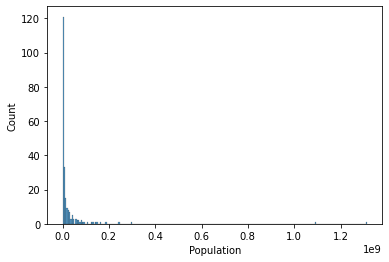

In [6]:
sns.histplot(data=df,x='Population')

### You should notice the histogram is skewed due to a few large countries , reset the X axis to only show countries with less than 0.5 billion people

<AxesSubplot:xlabel='Population', ylabel='Count'>

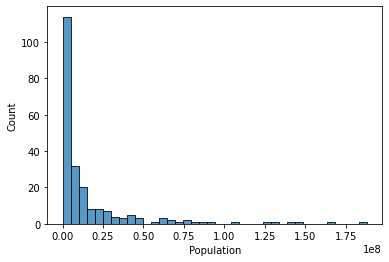

In [7]:
sns.histplot(data=df[df['Population']<200000000],x='Population')

### Now lets explore GDP and Regions . Create a bar chart showing the mean GDP per Capita per region

In [8]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

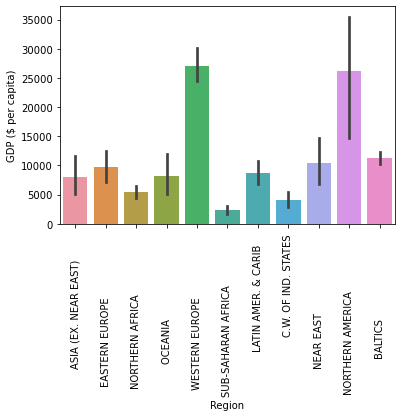

In [9]:

sns.barplot(data=df,y='GDP ($ per capita)',x='Region')
plt.xticks(rotation=90);

### lets Create a sactterplot showing the relationship between Phones per 100 people and the GDP per Capita 

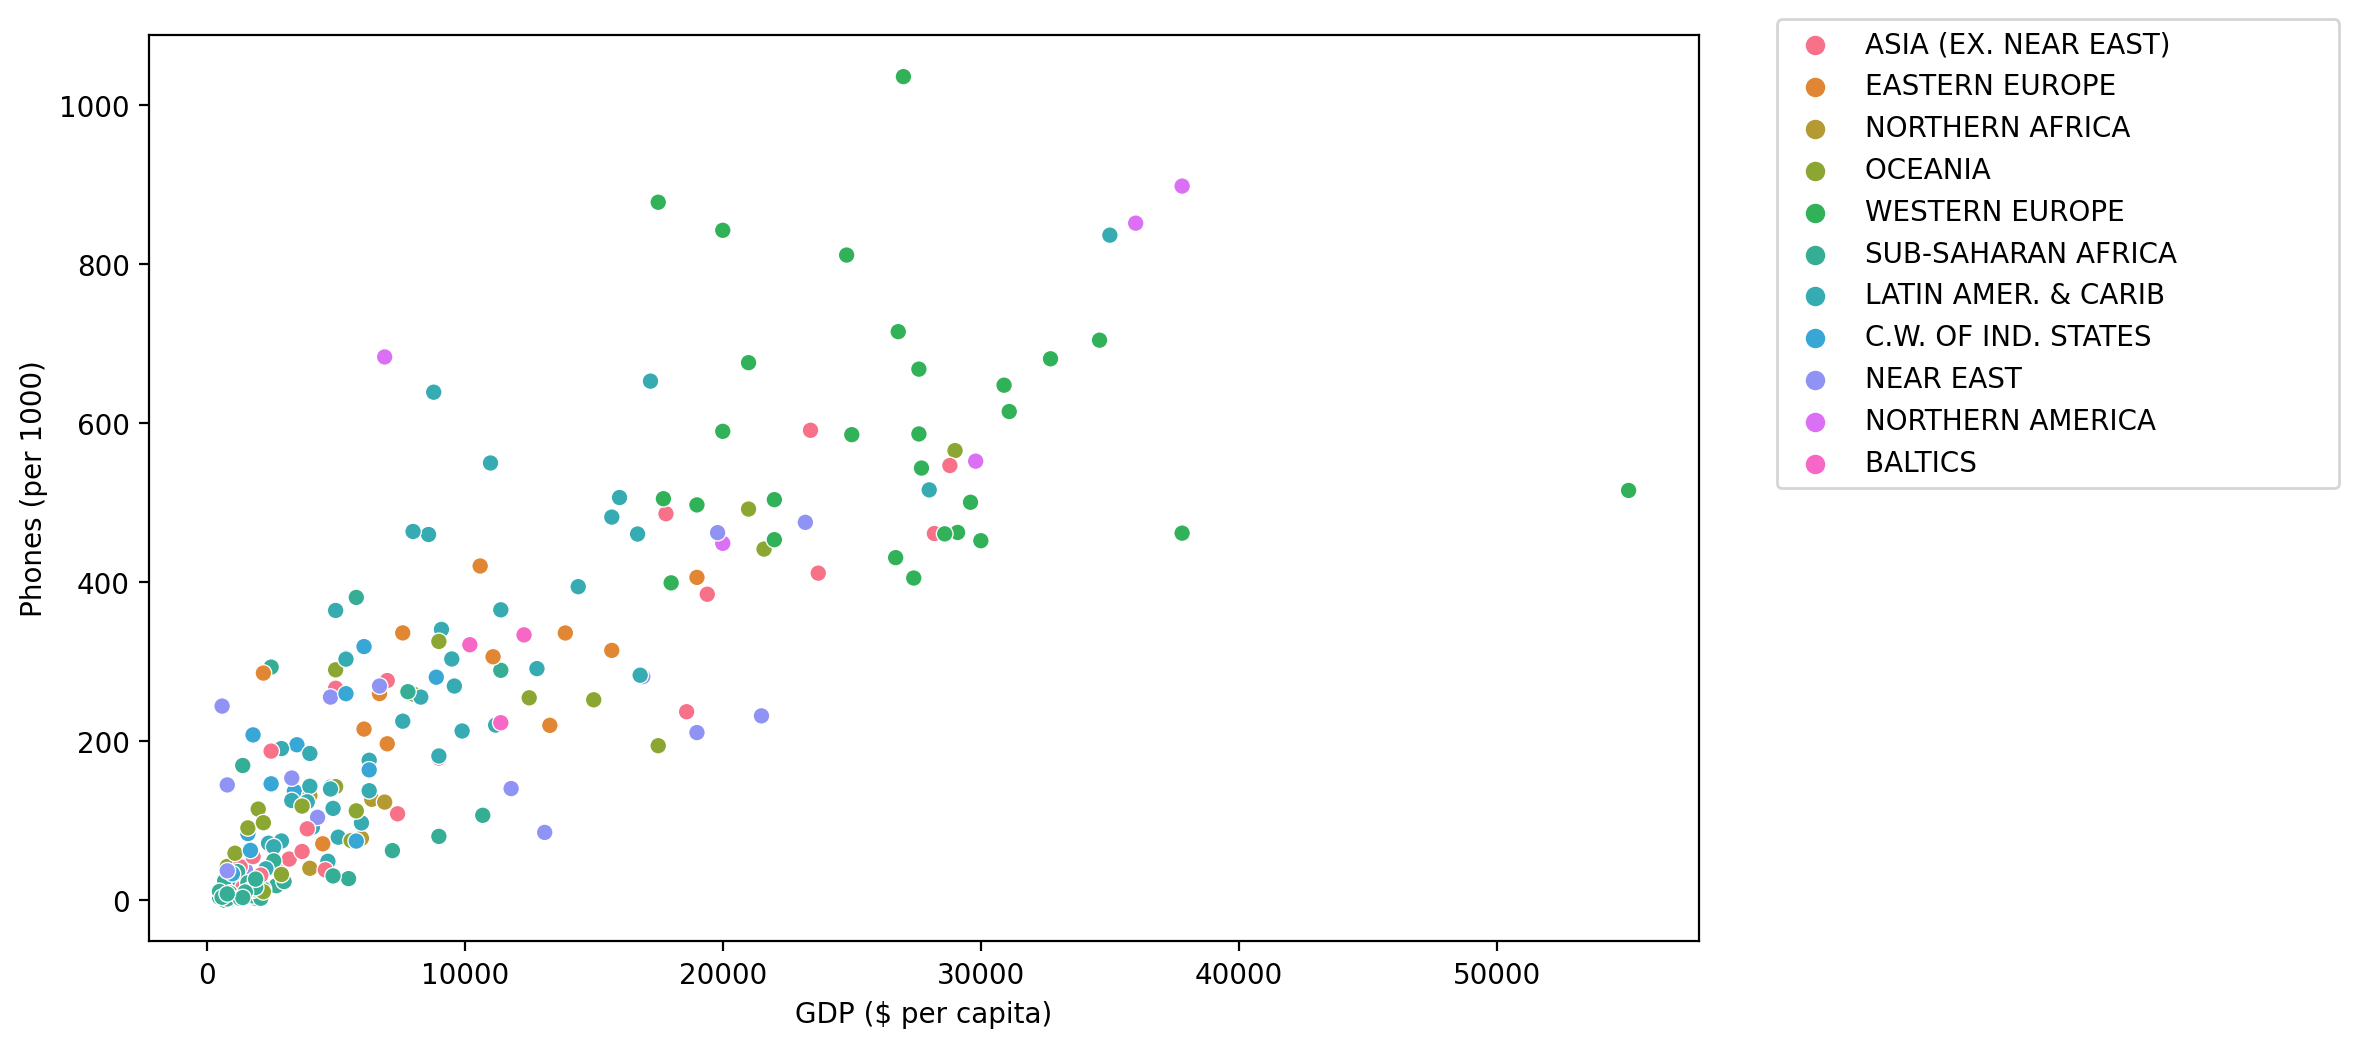

In [10]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5))

In [11]:
df[df['Phones (per 1000)']>900]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


In [12]:
df[df['GDP ($ per capita)']>50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


### Lets Create a scatter plot showing the realtionship between GDP per capita and Literacy color by region 

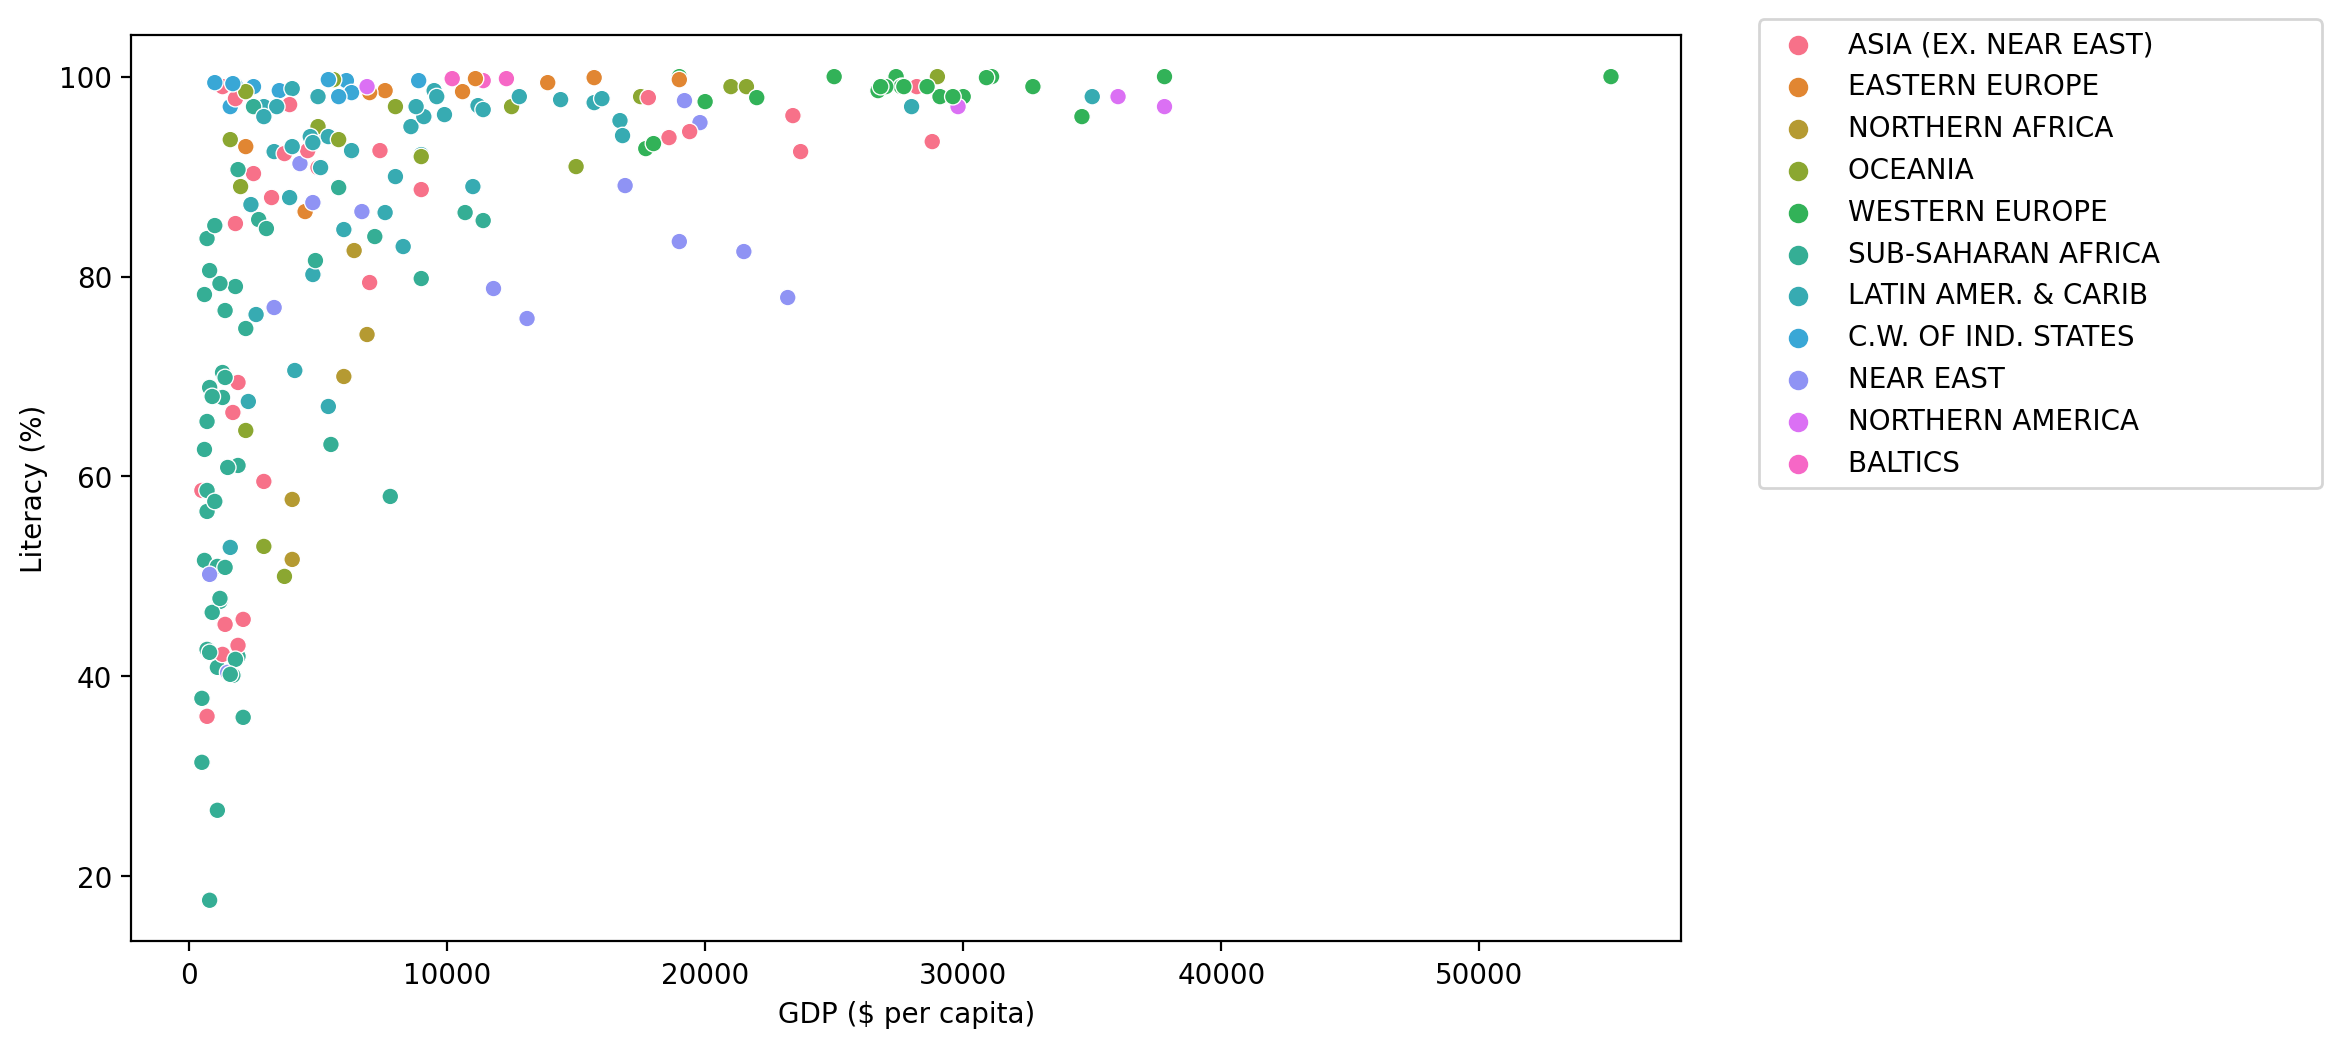

In [13]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')
plt.legend(loc=(1.05,0.5))

### let's Create a Heatmap of the Correlation between columns in the DataFrame

<AxesSubplot:>

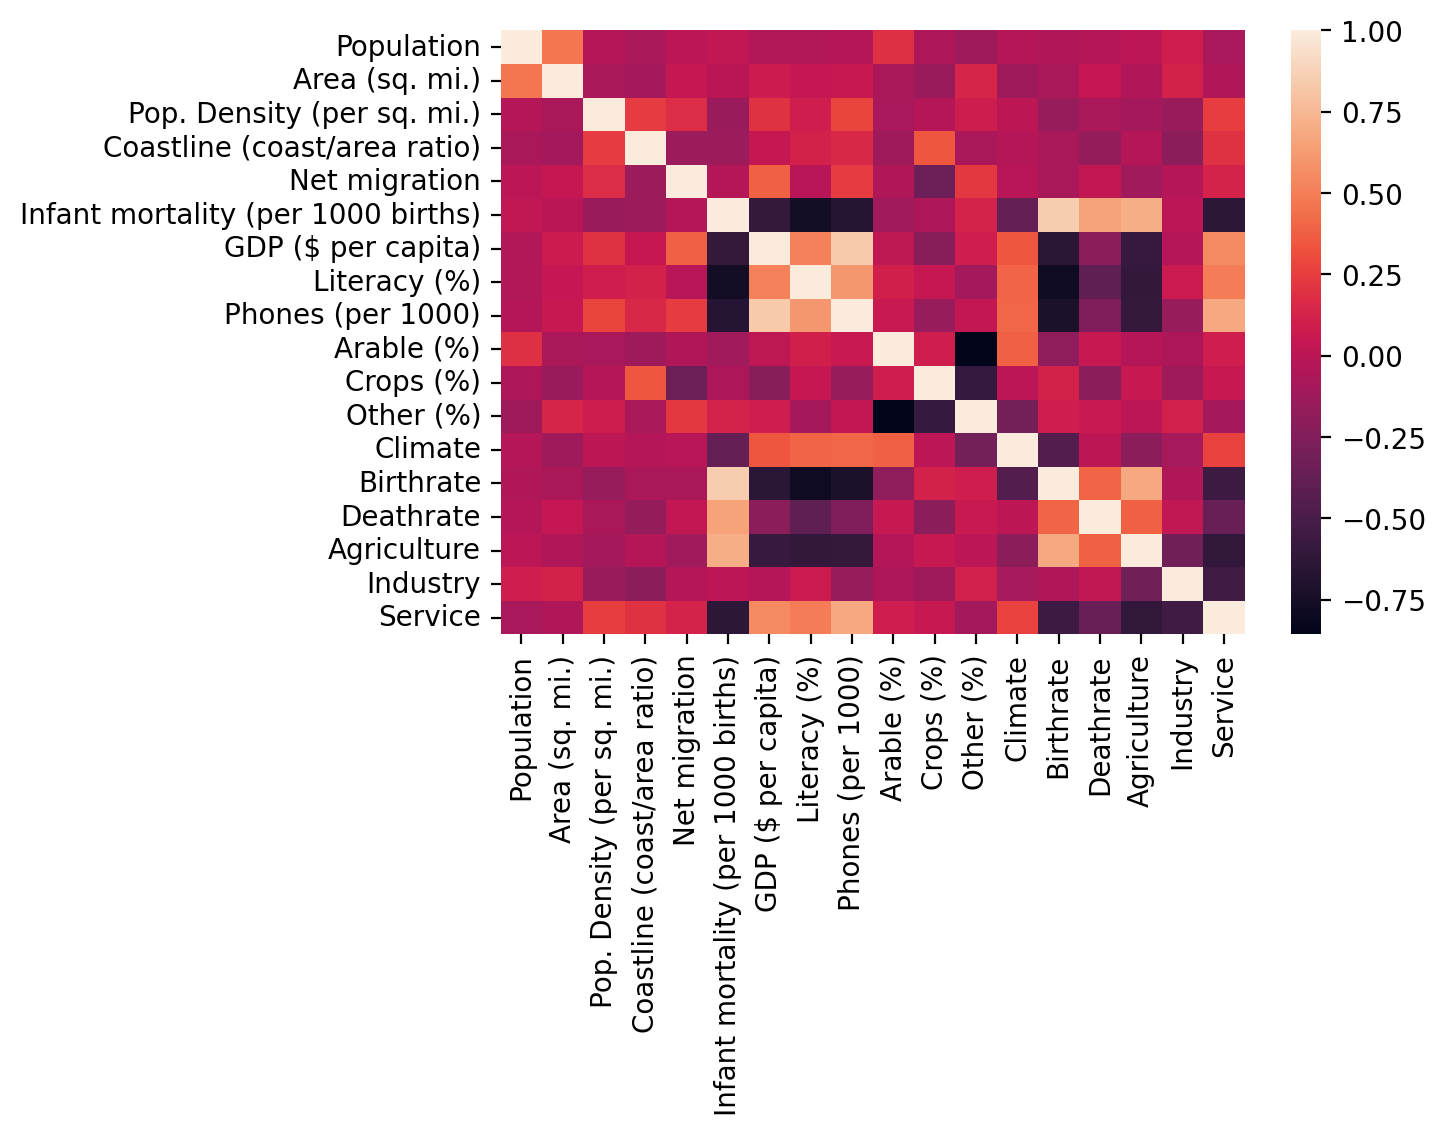

In [14]:
plt.figure(dpi=200)
sns.heatmap(df.corr())

### Create a clustermap of the correlation between each column with this function

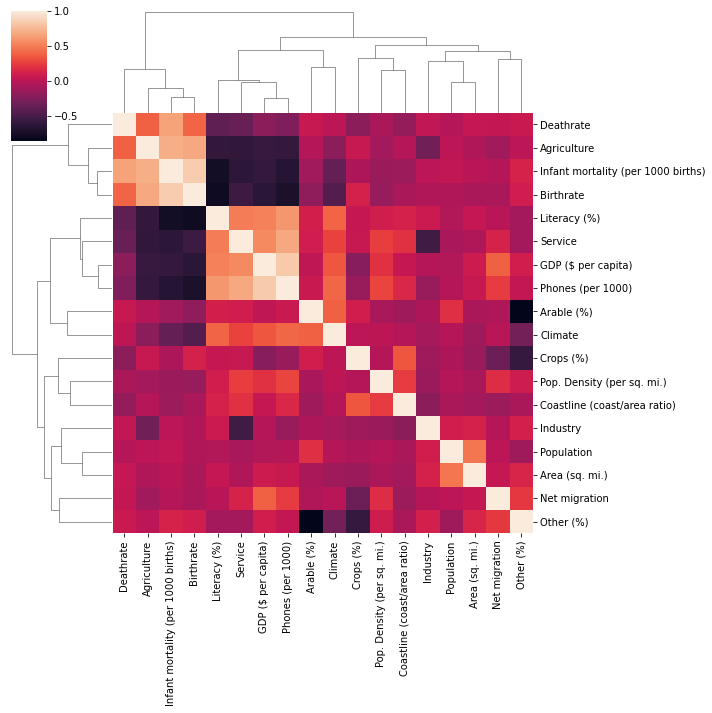

In [15]:
sns.clustermap(df.corr())

### Data Preparation and Model Discovery
lets now prepare our data for Kmeans Clustering

### Missing Data
lets explore the missing values

In [16]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

### what countries have NaN for Agricultre with main aspect of the countries


In [17]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

### You should have noticed most of these countries are tiny islands ,with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant . there should be 15 countries in total you do this for.

In [18]:
df[df['Agriculture'].isnull()]=df[df['Agriculture'].isnull()].fillna(0)

In [19]:
df[df['Agriculture'].isnull()]['Country']

Series([], Name: Country, dtype: object)

### Now check to see what is still missing by counting number of missing elements again per feature

In [20]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

#### Notice climate is missing for a few countries but not the Region! let's use this to our advantage .Fill in the missing Climate values based on the mean climate value for its region

In [21]:
df['Climate']=df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

#### Check again on many elements are missing:

In [22]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

### Its look like literacy percentage is missing . lets use the same tatic as we did with Climate missing values and fill in any missing literacy values with mean literacy of the Region

In [23]:
df['Literacy (%)']=df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [24]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

### We are now missing values for only few countries.Go ahead and drop these countries 

In [25]:
df=df.dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             221 non-null    object 
 1   Region                              221 non-null    object 
 2   Population                          221 non-null    int64  
 3   Area (sq. mi.)                      221 non-null    int64  
 4   Pop. Density (per sq. mi.)          221 non-null    float64
 5   Coastline (coast/area ratio)        221 non-null    float64
 6   Net migration                       221 non-null    float64
 7   Infant mortality (per 1000 births)  221 non-null    float64
 8   GDP ($ per capita)                  221 non-null    float64
 9   Literacy (%)                        221 non-null    float64
 10  Phones (per 1000)                   221 non-null    float64
 11  Arable (%)                          221 non-n

In [27]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


# Data Feature Preparation 

It is now time to prepare the data for clustering. The Country column is still a unique identifier string , so it won't be useful for clustering since its unique for each point

In [28]:
x=df.drop('Country',axis=1)

### Now lets create the Xn array of features the Regions column is still categorical strings use pandas to create dummy variables from this column to create a finalzed X matrix of continous feature along with dummy variables for the Regions

In [29]:
x=pd.get_dummies(x)

In [30]:
x

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


# Scaling 
Due to some measurements being in terms of percentage and other metrics being total counts (population ), we should scale this data first. Use Sklearn to scale the X feature matrics

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [33]:
scaled_x

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Creating and Fitting Kmeans Model 
Use a for loop to create and fit multiple KMeans models, tetsing from K=2-30 clusters.Keep track of the Sum of Squared Distances for each K value then plot this out to create an 'elbow' plot of K versus SSD

In [34]:
from sklearn.cluster import KMeans

In [35]:
ssd=[]
for k in range(2,30):
    model=KMeans(n_clusters=k)
    model.fit(scaled_x)
    
    # Get the SSD value and append it to the cluster
    ssd.append(model.inertia_)

In [36]:
ssd

[5496.1778057452575,
 4998.052998044811,
 4701.720206161837,
 4349.53509656768,
 4102.176171202924,
 3826.3349771793364,
 3573.515111906796,
 3305.3710354198274,
 3112.8718090606953,
 2838.7932315096396,
 2629.32067713955,
 2440.1534554561244,
 2278.2282849123653,
 2137.3804560726307,
 2059.5478895449064,
 1986.669710632344,
 1916.823251801768,
 1841.8548993398763,
 1773.549605684296,
 1745.4097408238645,
 1647.69296435715,
 1605.007770018397,
 1541.983378301383,
 1502.555413920432,
 1442.4574543371746,
 1399.2174948154427,
 1365.7180937445023,
 1309.3185220388016]

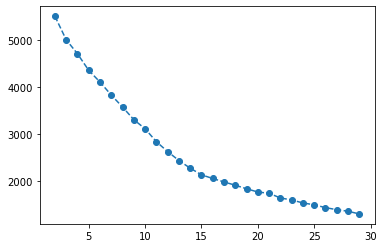

In [37]:
plt.plot(range(2,30),ssd,'o--')

<AxesSubplot:>

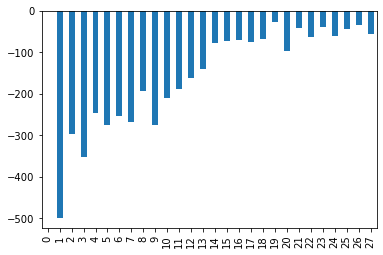

In [38]:
pd.Series(ssd).diff().plot(kind='bar')

#### Example Interpretation: Choosing K=3
    One could say that there is a significnat drop off in SSD diffrence at K=3

In [39]:
model=KMeans(n_clusters=3)
model.fit(scaled_x)

KMeans(n_clusters=3)

In [40]:
model.labels_

array([2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2])

In [41]:
x['k=3 Cluster Lables']=model.labels_

In [42]:
x.corr()['k=3 Cluster Lables'].sort_values()

Phones (per 1000)                            -0.765212
GDP ($ per capita)                           -0.727040
Literacy (%)                                 -0.571518
Region_WESTERN EUROPE                        -0.508855
Climate                                      -0.421200
Service                                      -0.419813
Region_EASTERN EUROPE                        -0.288858
Arable (%)                                   -0.252076
Pop. Density (per sq. mi.)                   -0.195797
Region_BALTICS                               -0.163477
Net migration                                -0.159428
Region_NORTHERN AMERICA                      -0.124028
Coastline (coast/area ratio)                 -0.080076
Region_LATIN AMER. & CARIB                   -0.038522
Region_OCEANIA                               -0.029099
Region_ASIA (EX. NEAR EAST)                  -0.020430
Region_C.W. OF IND. STATES                   -0.016330
Region_NEAR EAST                             -0.011887
Area (sq. 

<AxesSubplot:>

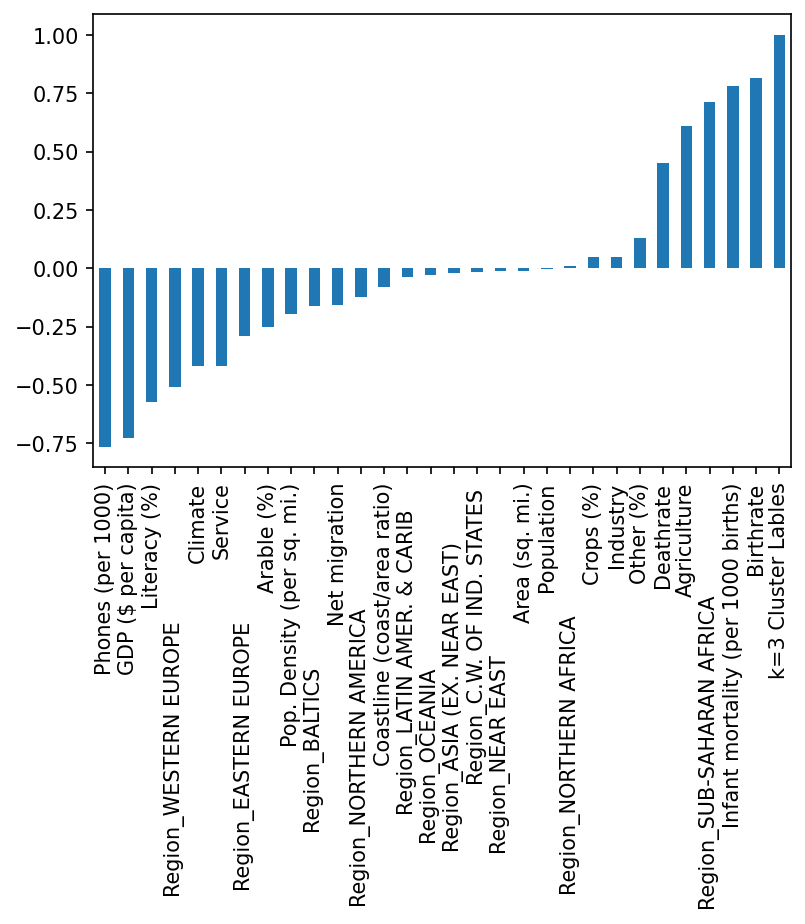

In [43]:
plt.figure(dpi=150)
x.corr()['k=3 Cluster Lables'].sort_values().plot(kind='bar')

## Geographical Model Interpreation

The best way to interupt this model is through visualizing the clusters of countries on a map!


We will plot out these clusters on a country level choropleth map:

Make to have the plotly library installed: https://plotly.com/python/getting-started/

Example of how to create a geographical choropleth map using plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

We will need ISO country codes for this: either use the Wikipedia page, or use our provided file from the data folder in this repository this: "./data/country_iso_codes.csv"

Combine the cluster labels, ISO Codes, and Country Names to create a world map plot with the plotly library

In [44]:
!pip install plotly

In [45]:
iso_codes=pd.read_csv('country_iso_codes.csv')

In [46]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [47]:
# convert the ISO codes to a dictionary 
iso_map=iso_codes.set_index('Country')['ISO Code'].to_dict()

In [48]:
df['ISO CODE'] = df['Country'].map(iso_map)

C:\Users\monis\AppData\Local\Temp\ipykernel_26372\2248382755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ISO CODE'] = df['Country'].map(iso_map)


In [49]:
df['Cluster']=model.labels_

C:\Users\monis\AppData\Local\Temp\ipykernel_26372\2459492457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=model.labels_


In [50]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO CODE,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,2
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,1
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM,1
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,...,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,NaN,1
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,...,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400,NaN,1
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,...,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,YEM,1
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,...,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,ZMB,2


In [52]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO CODE",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    )
fig.show()